# Problem 3



In [9]:
import numpy as np
import matplotlib.pyplot as plt

As usual, set default variables.

In [10]:
N = 30
np.random.seed(0)
X = np.random.randn(2,N)
y = np.sign(X[0,:]**2+X[1,:]**2-0.7)
theta = 0.5
c,s = np.cos(theta), np.sin(theta)
X = np.array([[c,-s], [s,c]])@X
X = X + np.array([[1],[1]])

## 1. Check whether given data is linearly separable

We make 2D scatter plot, with coordinate as columns of X. Blue points are positive points, i.e., corresponding y is positive. Red points are negative points.

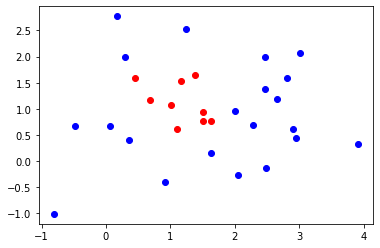

In [11]:
positive_X = np.array([X[0,y>0], X[1,y>0]])
negative_X = np.array([X[0,y<0], X[1,y<0]])
plt.scatter(positive_X[0], positive_X[1], c="#0000FF")
plt.scatter(negative_X[0], negative_X[1], c="#FF0000")
plt.show()

As you can see, blue points surrounds red points. This is obviously impossible to separate by any line.

## 2. Check whether (phi(X), y) is linearly separable

It is enough to find function $f:\phi(X) \rightarrow y$ satisfying $f(x) > 0$ if and only if corresponding $y>0$.
In fact, we will do somethig more : find $f(x) \approx 1$ whenever $y>0$, and vice versa by logistic regression.
Here I choose logistic regerssion because, it is differentiable, so much easier to describe.

We use exactly same techniques used in previous problems.
First, compute $\phi(X)$ (denoted by x) and set theta randomly.

In [12]:
x = np.asarray((np.ones(N), X[0], X[0]**2, X[1], X[1]**2)).T
np.random.seed(0)
theta = np.random.randn(5)

Define functions used in Problem 1.

In [13]:
def f(theta : np.ndarray, i : int) -> np.float64:
    return np.log(1 + np.exp(-y[i]*np.dot(x[i],theta)))

def F(theta : np.ndarray) -> np.float64:
    return sum(f(theta,i) for i in range(N))/N

def grad_f(theta : np.ndarray, i : int) -> np.ndarray:
    denominator = 1+np.exp(y[i]*np.dot(x[i],theta))
    numerator = -y[i]*x[i]
    return numerator/denominator

Apply SGD with learning rate = 0.03 and iteration = 30,000.

In [14]:
alpha = 0.03
thetas = []
values = []

iteration_num = 30000
for _ in range(iteration_num):
    i = np.random.randint(N)
    theta -= alpha*grad_f(theta, i)
    thetas.append(theta.copy())
    values.append(F(theta))

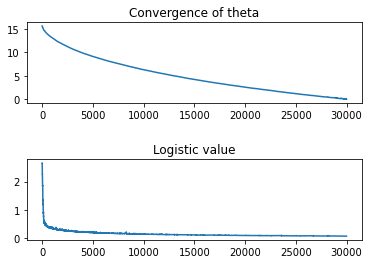

In [15]:
x_axis = np.arange(iteration_num)
y_distance = np.apply_along_axis(np.linalg.norm, axis=1,
                                 arr=np.array(thetas)-thetas[-1])
y_value = np.array(values)


plt.cla()
plt.subplot(2,1,1)
plt.plot(x_axis, y_distance)
plt.title("Convergence of theta")

plt.subplot(2,1,2)
plt.plot(x_axis, y_value)
plt.title("Logistic value")

plt.subplots_adjust(hspace=0.7)
plt.show()

We get familiar results.

## 3. Visualizing separability (Kernel method)

Now, we draw a scatter graph visualizing previous separation. Since $\phi(X)$ is 5-dimensional, instead of drawing $\phi(X)$ directrly, we use scatter graph of $X$.

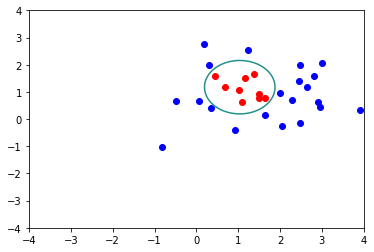

In [17]:
xx = np.linspace(-4,4,1024)
yy = np.linspace(-4,4,1024)
xx, yy = np.meshgrid(xx,yy)

z = theta[0] + theta[1]*xx + theta[2]*(xx**2) + \
               theta[3]*yy + theta[4]*(yy**2)

plt.scatter(positive_X[0], positive_X[1], c="#0000FF")
plt.scatter(negative_X[0], negative_X[1], c="#FF0000")
plt.contour(xx,yy,z,0)
plt.show()

Here, circle in center describes "kernel". As you can see, this separates blue and red dots well.